In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from scipy import stats
import statistics as stats
import collections
import glob
%pylab inline
betas=[i for i in range(11)]
exe = "/home/uniandes/HackingLSSCode/bin/./LSS_BSK_calc "

Populating the interactive namespace from numpy and matplotlib


In [ ]:
path = "/home/uniandes/abacus/data/AbacusCosmos_1100box_00_FoF_halos_z0.300/cuts"

archivos = glob.glob(path+"/*.dat")
for archivo in archivos:
    	
    exe = "/home/uniandes/HackingLSSCode/bin/./LSS_BSK_calc "
    salida = archivo.split("/")[-1]
    comm = "{} -input {} -output {} -beta 1.0 -printinfo false -numNNB 300".format(exe, archivo, salida+".bskel_shell"+ str(1))
    print(comm)

In [57]:
def entropy(ruta, salida,beta): #ruta es el file del catalogo. Salida es la 'extensión' para identificar i.e '.bskel_shell'
    #--Solo para un archivo de txt, un solo beta
    "Calcular BS"
    rutaSalida = ruta+salida+ str(beta)
    comm = "{} -input {} -output {} -beta 1.0 -printinfo false -numNNB 300".format(exe, ruta, rutaSalida)
    print(comm)
    "Cargar"
    data=np.loadtxt(rutaSalida)
    data=data.flatten()
    original=np.loadtxt(ruta)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?"""
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    print(np.sum(probabilidad))
    assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy

In [57]:
def entropy2(ruta, ruta2): #entrada es el archivo de pares que arroja el beta , ruta 2 es el archivo que meto al beta --Solo para un archivo de txt, un solo beta
    "Cargar"
    data=np.loadtxt(ruta)
    data=data.flatten()
    original=np.loadtxt(ruta2)
    "Contar"
    contador=collections.Counter(data)
    nodos=np.array(list(contador))
    contador_repeticiones=collections.Counter(contador.values())
    "Añadir ceros"
    n_total=len(original)
    n_beta=len(nodos)
    diferencia=n_total-n_beta
    if((diferencia)>0):
        contador_repeticiones.update({0:diferencia})
    repeticiones=list(contador_repeticiones.values())
    "Probabilidades"
    probabilidad=[]
    for i in range(len(contador_repeticiones)): #Aquí yo comparaba todos los betas con el beta1 - si beta2 max de conex era 13 pero en beta1 era 20, yo sacaba la probabilidad de n<=13 - que era 0 pero quizá afectaba 
        """¡DUDA!= en el caso de abajo, n=19 no está pero n=20 sí, eso afecta en algo; es decir debería calcular esa probabilidad aunque sea 0?"""
        probabilidad.append(repeticiones[i]/n_total)
    probabilidad=np.array(probabilidad)
    print(np.sum(probabilidad))
    assert(np.sum(probabilidad)==1)
    entropy=-np.sum(probabilidad*np.log(probabilidad))
    return entropy

In [44]:
file=(glob(glob("*1.BSKIndex")))

TypeError: 'module' object is not callable

In [62]:
d=("sphere_data_cut_2.dat.bskel1.BSKIndex")
d1=("sphere_data_cut_2.dat.bskel2.BSKIndex")
d2=("sphere_data_cut_2.dat.bskel3.BSKIndex")
d3=("sphere_data_cut_2.dat.bskel4.BSKIndex")
d4=("sphere_data_cut_2.dat.bskel5.BSKIndex")
"""d5=("sphere_data_cut_2.dat.bskel6.BSKIndex")
d6=("sphere_data_cut_2.dat.bskel7.BSKIndex")
d7=("sphere_data_cut_2.dat.bskel8.BSKIndex")
d8=("sphere_data_cut_2.dat.bskel9.BSKIndex")
d9=("sphere_data_cut_2.dat.bskel10.BSKIndex")
otro=("sphere_data_cut_2.dat.txt")"""
ds=d,d1,d2,d3,d4#,d5,d6,d7,d8,d9
"""
d=d.flatten()
c=collections.Counter(d)
n=np.array(list(c))
r=(collections.Counter(c.values()))
r.update({0:38})
rv=list(r.values())
pro=[]
print(np.sort(list(r)))
for i in range(len(r)):
    print(i)
    print(rv[i])    
    pro.append(rv[i]/9081)
 """
probas=[]
for de in ds:
    probas.append(entropy(de,otro))
print(probas)

1.0
1.0
1.0
1.0
1.0
[2.0457241303356755, 1.1369259805447758, 1.1915329933150196, 1.2025821083432988, 1.2012519045214136]


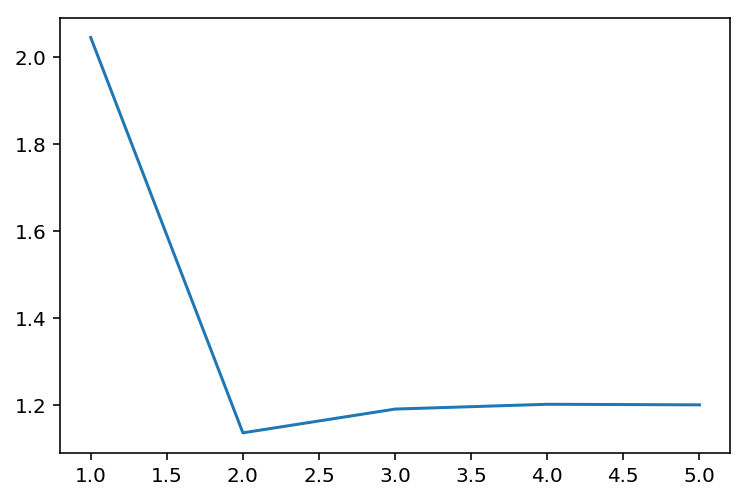

In [63]:
betas=[1,2,3,4,5]
plt.plot(betas,probas)